In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

prepare the data as show in the XOR table

In [21]:
x = np.array([ [0, 1], [1, 0], [1, 1], [0, 0]])
y = np.array([ [1], [1], [0], [0]])


In [22]:
x

array([[0, 1],
       [1, 0],
       [1, 1],
       [0, 0]])

In [23]:
y

array([[1],
       [1],
       [0],
       [0]])

define the number of nodes on each layer

In [24]:
num_input = 2
num_hidden = 5
num_output = 1

Initialize weights and biases randomly. First we initialize the input hidden layer weights

In [25]:
Wxh = np.random.randn(num_input, num_hidden)
bh = np.zeros((1, num_hidden))

In [26]:
Wxh

array([[-1.0795443 ,  1.00352292,  0.85902629, -1.80803909,  0.64852941],
       [ 1.23104352, -0.37546675,  0.54726687,  1.13341165, -0.72622281]])

In [27]:
bh

array([[0., 0., 0., 0., 0.]])

Now initialize hidden to output layer weights

In [28]:
Why = np.random.randn(num_hidden, num_output)
by = np.zeros((1, num_output))

In [29]:
Why

array([[ 0.32951204],
       [-0.21793479],
       [ 1.83571011],
       [-1.44284469],
       [-0.66847683]])

In [30]:
by

array([[0.]])

Define the sigmoid activation function 

In [31]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

Define the derivative of the sigmoid function

In [32]:
def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)

In [33]:
def forward_prop(x, Wxh, Why):
    z1 = np.dot(x, Wxh) + bh
    print(f'Z1 {z1}')
    a1 = sigmoid(z1)
    print(f'a1 = sigmoid(z1) {a1}')
    z2 = np.dot(a1, Why) + by
    print(f'z2 = a1 x Why {z2} ')
    y_hat = sigmoid(z2)
    print(f'y_hat = sigmoid(z2) {y_hat} ')
    
    return z1, a1, z2, y_hat
    

In [34]:
def backward_propagation(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, Why.T) * sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)
    
    return dJ_dWxh, dJ_dWhy

In [35]:
def cost_function(y, y_hat):
    J = 0.5 * sum((y-y_hat)**2)
    
    return J

Set the learning rate and number of iterations

In [36]:
alpha = 0.01
num_iterations = 5000


In [37]:
cost = []
for i in range(num_iterations):
    
    # perform forward propagation and predict output
    z1, a1, z2, y_hat = forward_prop(x, Wxh, Why)
    
    # perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backward_propagation(y_hat, z1, a1, z2)
    
    # update the weights
    Wxh = Wxh - alpha * dJ_dWxh
    Why = Why - alpha * dJ_dWhy
    
    # compute cost 
    c = cost_function(y, y_hat)
    
    # store the cost
    cost.append(c)

Z1 [[ 1.23104352 -0.37546675  0.54726687  1.13341165 -0.72622281]
 [-1.0795443   1.00352292  0.85902629 -1.80803909  0.64852941]
 [ 0.15149922  0.62805617  1.40629317 -0.67462745 -0.0776934 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77400116 0.40722072 0.63350125 0.75646796 0.32602415]
 [0.25359226 0.73175066 0.70245718 0.14087529 0.65667899]
 [0.53780253 0.65204857 0.80318062 0.33746145 0.48058641]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.01981443]
 [ 0.57135967]
 [ 0.70134978]
 [-0.08201708]] 
y_hat = sigmoid(z2) [[0.50495344]
 [0.63907685]
 [0.66848697]
 [0.47950722]] 
Z1 [[ 1.23099351 -0.3754586   0.5473644   1.13356062 -0.72615738]
 [-1.07961372  1.00356055  0.85891581 -1.80770656  0.64865115]
 [ 0.15137979  0.62810195  1.40628021 -0.67414595 -0.07750623]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77399241 0.40722269 0.6335239  0.7564954  0.32603853]
 [0.25357

 [-0.11685406]] 
y_hat = sigmoid(z2) [[0.495902  ]
 [0.62760377]
 [0.65646126]
 [0.47081968]] 
Z1 [[ 1.22856993 -0.37506625  0.55245091  1.14097678 -0.72293736]
 [-1.08296988  1.005492    0.85381718 -1.7911978   0.65467376]
 [ 0.14560004  0.63042576  1.40626809 -0.65022102 -0.0682636 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77356818 0.40731741 0.63470403 0.75785893 0.32674648]
 [0.25294441 0.732137   0.70136727 0.14292593 0.65806291]
 [0.53633584 0.65258599 0.80317666 0.34293973 0.48294072]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.01705364]
 [ 0.52102447]
 [ 0.64655618]
 [-0.11749643]] 
y_hat = sigmoid(z2) [[0.49573669]
 [0.62738729]
 [0.65623399]
 [0.47065964]] 
Z1 [[ 1.22852292 -0.37505874  0.55255666  1.14112448 -0.72287402]
 [-1.08303482  1.0055315   0.85372352 -1.79087011  0.65479285]
 [ 0.1454881   0.63047276  1.40628018 -0.64974563 -0.06808117]
 [ 0.          0.          0.          0.          0.

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77297461 0.40744256 0.63663163 0.75987478 0.32776602]
 [0.25206487 0.73273085 0.70007219 0.14592629 0.6600334 ]
 [0.53433452 0.6533901  0.80351594 0.35093708 0.48628758]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.06030711]
 [ 0.45788834]
 [ 0.57793066]
 [-0.16017817]] 
y_hat = sigmoid(z2) [[0.48492779]
 [0.61251311]
 [0.64059111]
 [0.46004086]] 
Z1 [[ 1.22514096 -0.37454161  0.56089008  1.15213926 -0.71824637]
 [-1.08768922  1.0085634   0.84757045 -1.76659625  0.66355768]
 [ 0.13745174  0.6340218   1.40846053 -0.61445699 -0.05468869]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.772967   0.40744407 0.63665846 0.75990145 0.32777926]
 [0.25205366 0.73273891 0.70005724 0.14596613 0.66005912]
 [0.53430894 0.65340083 0.80352301 0.35104317 0.48633124]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0608046

z2 = a1 x Why [[-0.09615923]
 [ 0.39965104]
 [ 0.51476472]
 [-0.19711281]] 
y_hat = sigmoid(z2) [[0.4759787 ]
 [0.59860382]
 [0.62592277]
 [0.45088073]] 
Z1 [[ 1.22159609 -0.37407767  0.57116685  1.16450754 -0.71329262]
 [-1.09252704  1.0121007   0.8424957  -1.73984601  0.67307671]
 [ 0.12906905  0.63802304  1.41366255 -0.57533847 -0.04021591]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77234431 0.40755608 0.63903238 0.76215079 0.3288717 ]
 [0.25114272 0.73343106 0.69899058 0.1493325  0.66219174]
 [0.53222254 0.65430643 0.80434298 0.36000592 0.48994738]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.09650939]
 [ 0.39903943]
 [ 0.51410217]
 [-0.19748496]] 
y_hat = sigmoid(z2) [[0.47589136]
 [0.59845685]
 [0.62576763]
 [0.45078859]] 
Z1 [[ 1.22155589 -0.37407302  0.57129228  1.16465256 -0.71323611]
 [-1.09258164  1.01214264  0.84244688 -1.73953619  0.67318607]
 [ 0.12897425  0.63806962  1.41373916 -0.57488363 -0.0400

 [0.4430426 ]] 
Z1 [[ 1.2176394  -0.3736986   0.58441648  1.17927809 -0.70772565]
 [-1.09787245  1.01638723  0.83867571 -1.70882051  0.68393075]
 [ 0.11976695  0.64268863  1.42309219 -0.52954242 -0.02379491]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77164786 0.40764761 0.642083   0.76481798 0.33010158]
 [0.25013874 0.73426828 0.69818623 0.15331676 0.66461543]
 [0.529906   0.65536097 0.80582272 0.37062362 0.49405155]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.12493657]
 [ 0.34427484]
 [ 0.45485683]
 [-0.22907724]] 
y_hat = sigmoid(z2) [[0.46880642]
 [0.58522856]
 [0.61179337]
 [0.44297982]] 
Z1 [[ 1.21760187 -0.37369581  0.58455052  1.17942288 -0.70767293]
 [-1.09792287  1.01642923  0.83864912 -1.70852198  0.68403426]
 [ 0.119679    0.64273342  1.42319964 -0.52909911 -0.02363867]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77164125 0.40764829 0.64211381 0.76484402 0.330

 [0.43841987]] 
Z1 [[ 1.2144448  -0.37351716  0.59632944  1.19189838 -0.70325837]
 [-1.10214418  1.02003005  0.83706241 -1.68323887  0.69274422]
 [ 0.11230062  0.64651289  1.43339185 -0.49134048 -0.01051415]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77108446 0.40769143 0.64481609 0.76708042 0.3310902 ]
 [0.24933835 0.73497845 0.69784616 0.15666707 0.66657711]
 [0.52804569 0.65622422 0.80742926 0.37957784 0.49737149]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.13975435]
 [ 0.30762156]
 [ 0.41529173]
 [-0.24775669]] 
y_hat = sigmoid(z2) [[0.46511817]
 [0.5763046 ]
 [0.60235606]
 [0.43837573]] 
Z1 [[ 1.21440882 -0.37351576  0.5964691   1.19204385 -0.70320834]
 [-1.10219207  1.02007175  0.83705166 -1.6829493   0.69284336]
 [ 0.11221675  0.64655598  1.43352076 -0.49090545 -0.01036498]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77107811 0.40769176 0.64484808 0.76710641 0.331

   0.00000000e+00]]
a1 = sigmoid(z1) [[0.77060177 0.40770739 0.64731077 0.76908304 0.33192673]
 [0.24866102 0.73560059 0.6977707  0.15959769 0.66824265]
 [0.52646173 0.65695984 0.80906462 0.38744053 0.50019098]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.14742878]
 [ 0.28119026]
 [ 0.38678586]
 [-0.25948644]] 
y_hat = sigmoid(z2) [[0.46320942]
 [0.56983801]
 [0.59550872]
 [0.43548996]] 
Z1 [[ 1.21167718e+00 -3.73450721e-01  6.07382825e-01  1.20328744e+00
  -6.99435544e-01]
 [-1.10581257e+00  1.02326773e+00  8.36705850e-01 -1.66094224e+00
   7.00343297e-01]
 [ 1.05864602e-01  6.49817006e-01  1.44408867e+00 -4.57654806e-01
   9.07753030e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
a1 = sigmoid(z1) [[0.77059557 0.40770747 0.64734356 0.76910908 0.33193739]
 [0.24865238 0.73560862 0.69777098 0.15963555 0.66826388]
 [0.52644146 0.65696922 0.80908701 0.38754232 0.50022694]
 [0.5        0.5        0.5        0.5   

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77002573 0.40770266 0.65042929 0.77153767 0.33290836]
 [0.2478627  0.73635047 0.69792553 0.16313522 0.67019876]
 [0.5245833  0.6578246  0.81128256 0.39697893 0.50350594]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.15161339]
 [ 0.25489808]
 [ 0.35840248]
 [-0.26918736]] 
y_hat = sigmoid(z2) [[0.46216909]
 [0.56338172]
 [0.58865366]
 [0.43310661]] 
Z1 [[ 1.2084222  -0.37347136  0.6210742   1.21716281 -0.69501406]
 [-1.11008877  1.0271263   0.83745292 -1.63480908  0.70917646]
 [ 0.09833343  0.65365494  1.45852712 -0.41764627  0.0141624 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.77001966 0.40770249 0.65046282 0.77156387 0.3329186 ]
 [0.24785434 0.73635839 0.6979285  0.16317263 0.67021916]
 [0.52456357 0.65783362 0.8113073  0.39708011 0.50354054]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.1516329

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76943418 0.407675   0.65374472 0.77411668 0.33389542]
 [0.24705387 0.73712093 0.69833725 0.16678085 0.67216186]
 [0.52266739 0.65869243 0.81380604 0.4068719  0.50683965]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.15155001]
 [ 0.2328873 ]
 [ 0.3345345 ]
 [-0.27530597]] 
y_hat = sigmoid(z2) [[0.46218485]
 [0.5579601 ]
 [0.58286228]
 [0.43160495]] 
Z1 [[ 1.20508516 -0.37358676  0.63569129  1.23185525 -0.69057426]
 [-1.11443113  1.03109811  0.8394181  -1.60834984  0.71806846]
 [ 0.09065403  0.65751135  1.47510939 -0.37649459  0.0274942 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76942817 0.40767462 0.65377882 0.77414312 0.33390534]
 [0.24704571 0.73712873 0.69834265 0.16681784 0.67218154]
 [0.522648   0.65870113 0.81383275 0.40697264 0.50687312]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.1515311

 [0.43088777]] 
Z1 [[ 1.20221412 -0.37374708  0.64859846  1.2448167  -0.68683146]
 [-1.11813484  1.03450387  0.84198263 -1.58599864  0.72556284]
 [ 0.08407928  0.66075679  1.49058109 -0.34118195  0.03873139]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76891843 0.40763591 0.65669456 0.77640132 0.3347383 ]
 [0.24635741 0.73778813 0.69888262 0.1699476  0.67383081]
 [0.52100745 0.65943037 0.81616548 0.4155224  0.50968164]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.14886306]
 [ 0.21704528]
 [ 0.31720227]
 [-0.27825394]] 
y_hat = sigmoid(z2) [[0.46285281]
 [0.5540493 ]
 [0.57864227]
 [0.4308819 ]] 
Z1 [[ 1.20218041 -0.37374925  0.64875143  1.24497047 -0.68678792]
 [-1.11817817  1.03454374  0.84201719 -1.58573883  0.72564994]
 [ 0.08400224  0.66079449  1.49076862 -0.34076837  0.03886202]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76891244 0.40763538 0.65672904 0.77642801 0.334

 [-0.27960899]] 
y_hat = sigmoid(z2) [[0.46400693]
 [0.5506128 ]
 [0.57487882]
 [0.43054964]] 
Z1 [[ 1.19914725 -0.37396604  0.66261382  1.25893642 -0.68290972]
 [-1.12206013  1.03811407  0.84551978 -1.56264339  0.73339847]
 [ 0.07708713  0.66414803  1.5081336  -0.30370697  0.05048875]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76837305 0.40758304 0.6598473  0.77884296 0.33561219]
 [0.24562935 0.73848595 0.69962647 0.17326767 0.6755506 ]
 [0.51926224 0.66019157 0.81878444 0.42465153 0.51261951]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.14416203]
 [ 0.20300554]
 [ 0.30162668]
 [-0.27961616]] 
y_hat = sigmoid(z2) [[0.46402178]
 [0.55057781]
 [0.57484012]
 [0.43054788]] 
Z1 [[ 1.19911354 -0.37396867  0.66276886  1.25909302 -0.68286703]
 [-1.1221031   1.03815355  0.84556291 -1.5623899   0.73348361]
 [ 0.07701044  0.66418488  1.50833177 -0.30329688  0.05061658]
 [ 0.          0.          0.          0.          0.

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.13970334]
 [ 0.19384607]
 [ 0.2912837 ]
 [-0.27977301]] 
y_hat = sigmoid(z2) [[0.46513086]
 [0.54831034]
 [0.57231038]
 [0.43050943]] 
Z1 [[ 1.19678501 -0.37416024  0.67351672  1.26997492 -0.67994027]
 [-1.12506303  1.04086871  0.84875164 -1.54506051  0.73931263]
 [ 0.07172198  0.66670847  1.52226836 -0.27508559  0.05937236]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76795236 0.40753615 0.66229016 0.78073845 0.33627463]
 [0.24507335 0.73901759 0.70030521 0.17580083 0.67684553]
 [0.51792281 0.66076574 0.82087226 0.43165902 0.51483873]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.13963432]
 [ 0.19372145]
 [ 0.29114165]
 [-0.27977084]] 
y_hat = sigmoid(z2) [[0.46514803]
 [0.54827947]
 [0.57227561]
 [0.43050996]] 
Z1 [[ 1.19675122 -0.37416315  0.67367319  1.27013374 -0.6798981 ]
 [-1.12510586  1.04090793  0.84880087 -1.54481166  0.73939647

z2 = a1 x Why [[-0.13333564]
 [ 0.18376327]
 [ 0.27964162]
 [-0.27920163]] 
y_hat = sigmoid(z2) [[0.46671539]
 [0.54581197]
 [0.56945836]
 [0.43064952]] 
Z1 [[ 1.19383832 -0.37442553  0.6872016   1.28391048 -0.6762951 ]
 [-1.12878567  1.04426841  0.85334351 -1.52365145  0.74654454]
 [ 0.06505266  0.66984289  1.54054511 -0.23974097  0.07024944]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76742684 0.40747209 0.66534412 0.78311469 0.3370887 ]
 [0.24438527 0.73967276 0.70126805 0.17892445 0.67842531]
 [0.51625743 0.66146798 0.82354395 0.44035019 0.51755514]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.13325879]
 [ 0.18365567]
 [ 0.27951552]
 [-0.2791911 ]] 
y_hat = sigmoid(z2) [[0.46673452]
 [0.5457853 ]
 [0.56942744]
 [0.4306521 ]] 
Z1 [[ 1.19380436 -0.37442871  0.68735973  1.28407205 -0.67625346]
 [-1.12882843  1.04430735  0.85339984 -1.52340816  0.74662697]
 [ 0.06497594  0.66987864  1.54075957 -0.23933612  0.0703

Z1 [[ 1.19162573 -0.3746373   0.69751752  1.29447683 -0.67359879]
 [-1.13156518  1.046793    0.85716734 -1.50796736  0.75187186]
 [ 0.06006055  0.6721557   1.55468486 -0.21349052  0.07827307]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7670317  0.40742096 0.66763715 0.78490398 0.33769148]
 [0.24387237 0.74015859 0.70206849 0.18124023 0.67958643]
 [0.51501063 0.66198569 0.82558934 0.44682917 0.51955828]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.12812989]
 [ 0.1770175 ]
 [ 0.27164114]
 [-0.27835381]] 
y_hat = sigmoid(z2) [[0.46801128]
 [0.54413918]
 [0.56749576]
 [0.43085741]] 
Z1 [[ 1.19159161 -0.37464063  0.69767683  1.29464041 -0.67355746]
 [-1.13160795  1.04683175  0.8572287  -1.5077281   0.75195335]
 [ 0.05998366  0.67219111  1.55490552 -0.21308769  0.07839589]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7670256  0.40742016 0.66767249 0.78493159 0.33770072]
 [0.24386

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76646192 0.40734409 0.67093317 0.78748281 0.33854738]
 [0.2431391  0.74084879 0.70332728 0.18452626 0.68122227]
 [0.51322044 0.66271777 0.82858067 0.45607384 0.52239008]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.12046556]
 [ 0.16859851]
 [ 0.26132284]
 [-0.2767481 ]] 
y_hat = sigmoid(z2) [[0.46991998]
 [0.54205007]
 [0.56496145]
 [0.4312512 ]] 
Z1 [[ 1.18840545 -0.37495921  0.71256962  1.30998502 -0.66973336]
 [-1.13558862  1.05042335  0.86326098 -1.48574383  0.75947484]
 [ 0.05281684  0.67546414  1.57583059 -0.17575881  0.08974147]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76645576 0.40734325 0.6709687  0.78751065 0.33855655]
 [0.24313122 0.74085619 0.70334152 0.18456141 0.6812397 ]
 [0.51320114 0.66272559 0.82861322 0.45617306 0.52242032]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.1203817

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.11752193]
 [ 0.16571437]
 [ 0.2576795 ]
 [-0.27605572]] 
y_hat = sigmoid(z2) [[0.47065329]
 [0.54133405]
 [0.56406578]
 [0.43142103]] 
Z1 [[ 1.18719958 -0.3750829   0.71821406  1.31582599 -0.66830309]
 [-1.13708906  1.05176943  0.86569409 -1.47760518  0.76227789]
 [ 0.05011052  0.67668653  1.58390815 -0.16177919  0.09397479]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76623984 0.40731339 0.67221362 0.78848642 0.33887691]
 [0.24285521 0.74111453 0.70384894 0.18578942 0.68184808]
 [0.51252501 0.66299876 0.8297573  0.45964318 0.52347642]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.11743753]
 [ 0.16563405]
 [ 0.25757711]
 [-0.27603539]] 
y_hat = sigmoid(z2) [[0.47067431]
 [0.5413141 ]
 [0.5640406 ]
 [0.43142602]] 
Z1 [[ 1.18716507 -0.37508646  0.71837565  1.31599339 -0.66826229]
 [-1.13713196  1.05180784  0.86576488 -1.47737372  0.76235777

z2 = a1 x Why [[-0.11566219]
 [ 0.16397294]
 [ 0.25544765]
 [-0.27560234]] 
y_hat = sigmoid(z2) [[0.47111664]
 [0.54090163]
 [0.5635169 ]
 [0.43153225]] 
Z1 [[ 1.1864396  -0.37516155  0.72177309  1.31951543 -0.66740635]
 [-1.13803307  1.05261407  0.86726792 -1.47252684  0.76403259]
 [ 0.04840654  0.67745252  1.58904102 -0.15301141  0.09662623]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76610369 0.4072944  0.67299734 0.78910108 0.33907784]
 [0.24268168 0.74127656 0.70417689 0.18655885 0.68222861]
 [0.51209927 0.66316989 0.83048114 0.46182161 0.52413778]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.11557753]
 [ 0.16389504]
 [ 0.25534721]
 [-0.27558144]] 
y_hat = sigmoid(z2) [[0.47113774]
 [0.54088229]
 [0.56349219]
 [0.43153738]] 
Z1 [[ 1.18640502 -0.37516514  0.72193507  1.31968346 -0.66736563]
 [-1.13807599  1.05265243  0.86734027 -1.47229669  0.76411222]
 [ 0.04832903  0.6774873   1.58927534 -0.15261323  0.0967

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76543662 0.40720003 0.67682222 0.79210326 0.34005068]
 [0.24183673 0.74206078 0.70586807 0.19027328 0.68405985]
 [0.51001983 0.66399637 0.83404989 0.47238184 0.52732879]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.10649438]
 [ 0.15614284]
 [ 0.24505529]
 [-0.27323656]] 
y_hat = sigmoid(z2) [[0.47340154]
 [0.53895659]
 [0.56095907]
 [0.4321127 ]] 
Z1 [[ 1.18268567 -0.37555619  0.73936996  1.33782117 -0.66302803]
 [-1.14267903  1.05674531  0.87547961 -1.4480116   0.77257112]
 [ 0.04000664  0.68118913  1.61484957 -0.11019043  0.10954309]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76543035 0.40719914 0.67685807 0.79213141 0.34005974]
 [0.24182883 0.74206808 0.70588461 0.19030777 0.68407682]
 [0.51000033 0.66400405 0.8340836  0.47248023 0.52735842]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.1064095

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.09998696]
 [ 0.1512041 ]
 [ 0.23812649]
 [-0.27147241]] 
y_hat = sigmoid(z2) [[0.47502406]
 [0.53772917]
 [0.5592519 ]
 [0.43254566]] 
Z1 [[ 1.17998521 -0.37584471  0.75204529  1.35105917 -0.65992907]
 [-1.14600549  1.05967669  0.88181338 -1.4309502   0.77858825]
 [ 0.03397971  0.68383199  1.63385866 -0.07989103  0.11865918]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76494514 0.40712949 0.67962419 0.79430274 0.34075555]
 [0.24121945 0.74262876 0.70719786 0.19295068 0.68537577]
 [0.50849411 0.66459342 0.83669755 0.48003786 0.52963004]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.09990287]
 [ 0.15114313]
 [ 0.23803875]
 [-0.27144934]] 
y_hat = sigmoid(z2) [[0.47504503]
 [0.53771401]
 [0.55923027]
 [0.43255132]] 
Z1 [[ 1.17995    -0.37584849  0.75221063  1.35123206 -0.65988894]
 [-1.14604878  1.05971469  0.8818982  -1.43073089  0.77866604

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76431494 0.40703828 0.68319759 0.79710372 0.34164526]
 [0.24043387 0.74334556 0.70899815 0.19630982 0.68702491]
 [0.50654493 0.6653455  0.84010763 0.489694   0.53252302]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.09165509]
 [ 0.14547522]
 [ 0.22960383]
 [-0.26916838]] 
y_hat = sigmoid(z2) [[0.47710225]
 [0.5363048 ]
 [0.55715011]
 [0.43311127]] 
Z1 [[ 1.17644795 -0.37622644  0.76867308  1.3684651  -0.65593111]
 [-1.15034581  1.06346825  0.89061446 -1.40930616  0.7863239 ]
 [ 0.02610214  0.6872418   1.65928754 -0.04084106  0.13039279]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76430854 0.40703735 0.68323378 0.79713205 0.34165422]
 [0.24042593 0.74335277 0.70901696 0.19634352 0.68704146]
 [0.50652517 0.66535307 0.84014234 0.48979115 0.53255209]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0915726

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.08480359]
 [ 0.14119236]
 [ 0.22278941]
 [-0.26726817]] 
y_hat = sigmoid(z2) [[0.4788118 ]
 [0.53523957]
 [0.55546811]
 [0.43357788]] 
Z1 [[ 1.17345062 -0.37655232  0.78279107  1.38325758 -0.65259585]
 [-1.15401098  1.0666411   0.89849627 -1.39157129  0.79275897]
 [ 0.01943964  0.69008878  1.68128735 -0.00831371  0.14016313]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76376816 0.4069587  0.68628134 0.79951367 0.34240481]
 [0.23975722 0.74395762 0.71064039 0.19915703 0.68842343]
 [0.50485976 0.66598668 0.84307492 0.49792158 0.53498353]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.08472295]
 [ 0.14114407]
 [ 0.22270996]
 [-0.26724588]] 
y_hat = sigmoid(z2) [[0.47883192]
 [0.53522755]
 [0.55544849]
 [0.43358335]] 
Z1 [[ 1.1734148  -0.37655623  0.78296     1.38343456 -0.65255627]
 [-1.15405472  1.06667882  0.89859275 -1.39136261  0.79283526

Z1 [[ 1.17046618 -0.3768785   0.79688152  1.39801379 -0.6493212 ]
 [-1.15765095  1.06976657  0.90671172 -1.37444621  0.79906579]
 [ 0.01281523  0.69288807  1.70359324  0.02356758  0.1497446 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76322927 0.40687998 0.68930701 0.80186852 0.34314252]
 [0.23909438 0.74455252 0.71232681 0.20190244 0.68977461]
 [0.50320376 0.66660908 0.84600345 0.50589162 0.53736635]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.07811198]
 [ 0.13734316]
 [ 0.21623984]
 [-0.26543078]] 
y_hat = sigmoid(z2) [[0.48048193]
 [0.53428192]
 [0.55385029]
 [0.43402917]] 
Z1 [[ 1.17043009 -0.37688246  0.79705216  1.39819237 -0.64928187]
 [-1.15769492  1.06980418  0.90681326 -1.3742423   0.79914148]
 [ 0.01273517  0.69292172  1.70386541  0.02395008  0.14985961]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76322275 0.40687903 0.68934356 0.80189689 0.34315138]
 [0.23908

Z1 [[ 1.16767787 -0.37718463  0.81008283  1.41181636 -0.64630238]
 [-1.16104491  1.07265846  0.91470518 -1.35891267  0.80487423]
 [ 0.00663295  0.69547383  1.72478801  0.05290369  0.15857184]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76272502 0.40680611 0.69212715 0.80405227 0.34382327]
 [0.23847747 0.74510215 0.71396202 0.20441708 0.69101616]
 [0.50165823 0.6671835  0.84874453 0.51322284 0.5395601 ]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.07213014]
 [ 0.13416464]
 [ 0.21043861]
 [-0.26381878]] 
y_hat = sigmoid(z2) [[0.48197528]
 [0.53349094]
 [0.55241636]
 [0.4344252 ]] 
Z1 [[ 1.16764153 -0.37718863  0.81025511  1.41199628 -0.6462633 ]
 [-1.1610891   1.07269598  0.91481131 -1.35871317  0.80494941]
 [ 0.00655243  0.69550734  1.72506643  0.05328311  0.1586861 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76271845 0.40680514 0.69216386 0.80408062 0.34383209]
 [0.23846

   0.00000000e+00]]
a1 = sigmoid(z1) [[0.76206415 0.40670896 0.69580919 0.80688378 0.34470187]
 [0.2376733  0.74581297 0.71618364 0.20763402 0.69261247]
 [0.49963787 0.6679255  0.85233451 0.52264476 0.54238577]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.06458696]
 [ 0.13049894]
 [ 0.20315874]
 [-0.26184602]] 
y_hat = sigmoid(z2) [[0.48385887]
 [0.53257851]
 [0.55061571]
 [0.43490997]] 
Z1 [[ 1.16399300e+00 -3.77591284e-01  8.27594816e-01  1.43006891e+00
  -6.42371642e-01]
 [-1.16552262e+00  1.07644193e+00  9.25721205e-01 -1.33905262e+00
   8.12435939e-01]
 [-1.52962100e-03  6.98850643e-01  1.75331602e+00  9.10162951e-02
   1.70064297e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
a1 = sigmoid(z1) [[0.76205751 0.40670798 0.69584613 0.80691205 0.34471062]
 [0.23766525 0.74582006 0.71620641 0.2076659  0.69262835]
 [0.49961759 0.6679329  0.85237056 0.52273838 0.5424139 ]
 [0.5        0.5        0.5        0.5   

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.05787365]
 [ 0.12755708]
 [ 0.19668713]
 [-0.26016329]] 
y_hat = sigmoid(z2) [[0.48553562]
 [0.5318461 ]
 [0.54901387]
 [0.43532357]] 
Z1 [[ 1.16061066 -0.37796685  0.84374687  1.44682425 -0.63882115]
 [-1.16962768  1.07987994  0.93626903 -1.32147032  0.81927195]
 [-0.00901702  0.70191308  1.7800159   0.12535393  0.1804508 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76144366 0.40661736 0.69925376 0.8095092  0.34551307]
 [0.23692229 0.74647126 0.7183454  0.21057377 0.69408177]
 [0.49774576 0.66861179 0.85569883 0.53129751 0.54499068]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.05780186]
 [ 0.12752727]
 [ 0.19661789]
 [-0.26014573]] 
y_hat = sigmoid(z2) [[0.48555356]
 [0.53183868]
 [0.54899673]
 [0.43532789]] 
Z1 [[ 1.16057376 -0.37797096  0.84392351  1.44700699 -0.63878272]
 [-1.16967244  1.07991727  0.93638633 -1.32128186  0.819346  

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76105392 0.4065596  0.70141204 0.81114133 0.34601594]
 [0.23645234 0.74688058 0.71973862 0.2123807  0.69499111]
 [0.4965594  0.66903808 0.85780731 0.53663646 0.54660433]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.05368104]
 [ 0.12587567]
 [ 0.1926403 ]
 [-0.2591543 ]] 
y_hat = sigmoid(z2) [[0.48658296]
 [0.53142743]
 [0.54801169]
 [0.43557161]] 
Z1 [[ 1.15842923 -0.37821041  0.85420897  1.45762682 -0.63655991]
 [-1.17227384  1.08208121  0.94328601 -1.31044929  0.82363187]
 [-0.0138446   0.7038708   1.79749498  0.14717752  0.18707196]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76104718 0.4065586  0.70144932 0.81116943 0.34602459]
 [0.23644422 0.74688763 0.71976294 0.21241167 0.69500674]
 [0.4965389  0.66904542 0.85784373 0.53672811 0.54663207]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0536107

Z1 [[ 1.15612699 -0.37846872  0.86529244  1.4690218  -0.63419743]
 [-1.17506618  1.08439189  0.95086906 -1.29908198  0.82819459]
 [-0.01893919  0.70592317  1.8161615   0.16993981  0.19399716]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76062826 0.40649628 0.70376521 0.81290866 0.34655939]
 [0.23594047 0.74732421 0.72128992 0.21431956 0.69597305]
 [0.49526534 0.6694997  0.8601049  0.542383   0.54834776]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.04929918]
 [ 0.12424986]
 [ 0.18840201]
 [-0.25813891]] 
y_hat = sigmoid(z2) [[0.4876777 ]
 [0.53102257]
 [0.54696167]
 [0.43582126]] 
Z1 [[ 1.15608977 -0.37847291  0.86547196  1.46920593 -0.63415944]
 [-1.17511131  1.08442914  0.95099311 -1.29890044  0.82826803]
 [-0.01902154  0.70595623  1.81646507  0.17030549  0.19410859]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76062148 0.40649527 0.70380263 0.81293666 0.346568  ]
 [0.23593

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.04582207]
 [ 0.123058  ]
 [ 0.18503033]
 [-0.25736433]] 
y_hat = sigmoid(z2) [[0.48854649]
 [0.53072574]
 [0.54612606]
 [0.43601172]] 
Z1 [[ 1.15418854 -0.37868733  0.8746601   1.47860981 -0.63222715]
 [-1.17741747  1.08632818  0.95739223 -1.28971709  0.83200729]
 [-0.02322893  0.70764085  1.83205233  0.18889272  0.19978014]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.76027514 0.40644354 0.70571444 0.81436251 0.34700571]
 [0.23551686 0.74768966 0.72259938 0.2159007  0.69677919]
 [0.49419303 0.66987966 0.86200604 0.54708327 0.54977958]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0457545 ]
 [ 0.12303572]
 [ 0.18496473]
 [-0.25734957]] 
y_hat = sigmoid(z2) [[0.48856337]
 [0.53072019]
 [0.5461098 ]
 [0.43601535]] 
Z1 [[ 1.1541512  -0.37869155  0.8748409   1.47879446 -0.63218936]
 [-1.17746277  1.0863654   0.95751912 -1.28953851  0.83208049

Z1 [[ 1.15201866 -0.37893336  0.88518721  1.4893342  -0.63004189]
 [-1.18005025  1.08848637  0.96484138 -1.27945326  0.83624562]
 [-0.02803159  0.70955302  1.85002859  0.20988095  0.20620373]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75987944 0.40638418 0.70789598 0.81597832 0.34750104]
 [0.23504316 0.74809659 0.72409008 0.21764331 0.69767391]
 [0.49299256 0.67030239 0.86413046 0.55227847 0.55136904]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.04187555]
 [ 0.12181383]
 [ 0.1811926 ]
 [-0.25652142]] 
y_hat = sigmoid(z2) [[0.48953264]
 [0.53041586]
 [0.54517462]
 [0.43621901]] 
Z1 [[ 1.15198118 -0.37893762  0.88536945  1.48951937 -0.63000433]
 [-1.18009574  1.08852357  0.9649714  -1.27927797  0.83631857]
 [-0.02811456  0.70958595  1.85034085  0.21024139  0.20631424]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7598726  0.40638316 0.70793367 0.81600612 0.34750956]
 [0.23503

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75939937 0.40631178 0.71053921 0.81791952 0.34809525]
 [0.23446973 0.74858681 0.72593034 0.21971628 0.69874778]
 [0.4915376  0.67081112 0.86669831 0.55847979 0.5532769 ]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.03729549]
 [ 0.12051966]
 [ 0.17672233]
 [-0.25559533]] 
y_hat = sigmoid(z2) [[0.49067721]
 [0.5300935 ]
 [0.54406596]
 [0.43644678]] 
Z1 [[ 1.14935175 -0.37923782  0.89818829  1.50250085 -0.62738505]
 [-1.18328796  1.09112662  0.97420551 -1.26714919  0.84141466]
 [-0.03393621  0.7118888   1.87239381  0.23535166  0.21402961]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75939249 0.40631074 0.71057705 0.81794717 0.34810371]
 [0.23446153 0.74859381 0.72595695 0.21974565 0.69876308]
 [0.49151676 0.67081838 0.86673502 0.55856782 0.55330407]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0372308

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75880596 0.40622161 0.71380189 0.82028977 0.34881966]
 [0.23376261 0.74918792 0.72825069 0.2222167  0.70005866]
 [0.48974104 0.67143412 0.86985605 0.56599202 0.55560545]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.03181384]
 [ 0.11919131]
 [ 0.17134632]
 [-0.25456693]] 
y_hat = sigmoid(z2) [[0.49204721]
 [0.5297626 ]
 [0.54273208]
 [0.43669974]] 
Z1 [[ 1.14610651 -0.37961172  0.91410741  1.51849826 -0.62419464]
 [-1.18723192  1.09432304  0.98590358 -1.25262847  0.84764954]
 [-0.04112541  0.71471133  1.90001099  0.26586979  0.22345489]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75879904 0.40622055 0.71383993 0.82031723 0.34882805]
 [0.23375437 0.7491949  0.72827804 0.22224547 0.70007385]
 [0.4897201  0.67144135 0.86989277 0.56607866 0.55563243]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0317510

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75834101 0.40615037 0.71635521 0.82212424 0.34937959]
 [0.23320967 0.74965546 0.73010211 0.22412835 0.70107383]
 [0.48833464 0.67191804 0.87231609 0.57176059 0.55740802]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.02764879]
 [ 0.11834997]
 [ 0.16724137]
 [-0.25384854]] 
y_hat = sigmoid(z2) [[0.49308824]
 [0.529553  ]
 [0.54171316]
 [0.43687647]] 
Z1 [[ 1.14356759 -0.37990709  0.92664137  1.53099287 -0.62173079]
 [-1.1903217   1.09681275  0.99528236 -1.24160559  0.85248872]
 [-0.04675411  0.71690566  1.92192373  0.28938728  0.23075793]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75833405 0.4061493  0.7163934  0.82215154 0.34938791]
 [0.23320141 0.74966243 0.73013002 0.22415663 0.70108895]
 [0.4883136  0.67192526 0.8723528  0.57184612 0.55743484]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0275873

Z1 [[ 1.14117222 -0.38018827  0.93853354  1.54276257 -0.61943185]
 [-1.19324095  1.09915394  1.00430932 -1.23147154  0.85702569]
 [-0.05206873  0.71896567  1.94284287  0.31129103  0.23759384]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7578948  0.40608149 0.71880334 0.82386596 0.34991068]
 [0.2326798  0.75010155 0.731905   0.22592398 0.70203886]
 [0.48698576 0.67237921 0.87466413 0.57720036 0.5591206 ]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.02375213]
 [ 0.11769988]
 [ 0.16338437]
 [-0.2532292 ]] 
y_hat = sigmoid(z2) [[0.49406225]
 [0.52939105]
 [0.54075547]
 [0.43702884]] 
Z1 [[ 1.14113414 -0.38019276  0.93872314  1.54294954 -0.6193955 ]
 [-1.1932874   1.0991911   1.00445422 -1.23131248  0.85709761]
 [-0.05215326  0.71899834  1.94317736  0.31163705  0.2377021 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75788781 0.40608041 0.71884167 0.82389309 0.34991895]
 [0.23267

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75739048 0.40600297 0.72156785 0.82581234 0.35050364]
 [0.23208167 0.7506029  0.73397187 0.22790782 0.70311934]
 [0.48546201 0.67289685 0.87730151 0.58323597 0.56103663]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.01945923]
 [ 0.11714308]
 [ 0.15911601]
 [-0.25260954]] 
y_hat = sigmoid(z2) [[0.49513535]
 [0.52925233]
 [0.53969529]
 [0.43718131]] 
Z1 [[ 1.13838748 -0.38051841  0.95244351  1.55642159 -0.61679013]
 [-1.19664073  1.10186751  1.01501713 -1.22000767  0.8622681 ]
 [-0.05825325  0.7213491   1.96746064  0.33641393  0.24547797]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75738346 0.40600187 0.72160632 0.82583928 0.35051184]
 [0.23207335 0.75060986 0.73400086 0.2279351  0.70313431]
 [0.48544081 0.67290403 0.8773381  0.58331916 0.56106316]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0194002

 [0.43730715]] 
Z1 [[ 1.13578516 -0.3808303   0.96552721  1.56916147 -0.6143512 ]
 [-1.19982445  1.10439658  1.0252268  -1.20959713  0.86713856]
 [-0.06403929  0.72356628  1.99075401  0.35956434  0.25278736]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75690495 0.40592665 0.72422708 0.82766404 0.35106727]
 [0.23150645 0.75108298 0.73598947 0.22977234 0.70414994]
 [0.48399565 0.67339185 0.87982289 0.58893497 0.56286245]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.01543066]
 [ 0.11677831]
 [ 0.15509174]
 [-0.25209112]] 
y_hat = sigmoid(z2) [[0.49614241]
 [0.52916144]
 [0.5386954 ]
 [0.43730887]] 
Z1 [[ 1.13574683 -0.38083492  0.96572053  1.56934892 -0.61431549]
 [-1.19987139  1.10443378  1.02537861 -1.20944595  0.86721009]
 [-0.06412456  0.72359886  1.99109915  0.35990297  0.2528946 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7568979  0.40592554 0.72426569 0.82769077 0.351

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75633233 0.40583568 0.72736056 0.82982006 0.351723  ]
 [0.23082861 0.75164626 0.73840185 0.23191451 0.70535411]
 [0.48226675 0.67397175 0.88277247 0.59551701 0.56499308]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.01080181]
 [ 0.11655503]
 [ 0.15044498]
 [-0.25157507]] 
y_hat = sigmoid(z2) [[0.49729957]
 [0.52910581]
 [0.53754047]
 [0.43743586]] 
Z1 [[ 1.13263712 -0.38121226  0.98146759  1.58454013 -0.61143882]
 [-1.20368556  1.10744895  1.03783431 -1.19738557  0.87299706]
 [-0.07104844  0.72623669  2.0193019   0.38715456  0.26155824]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75632524 0.40583455 0.72739932 0.82984655 0.35173105]
 [0.23082022 0.75165321 0.73843192 0.23194064 0.70536894]
 [0.48224536 0.6739789  0.8828088  0.59559753 0.5650193 ]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.0107453

 [0.43749846]] 
Z1 [[ 1.13082817 -0.38143418  0.99068466  1.59336045 -0.60978394]
 [-1.20590959  1.10920015  1.04520375 -1.19055423  0.87634852]
 [-0.07508142  0.72776597  2.0358884   0.40280623  0.26656457]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7559917  0.40578104 0.72922313 0.83108837 0.35210848]
 [0.2304256  0.75197997 0.73985282 0.23315983 0.70606497]
 [0.48123846 0.67431484 0.88451394 0.5993617  0.56624932]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.00810711]
 [ 0.11652457]
 [ 0.1477284 ]
 [-0.25131563]] 
y_hat = sigmoid(z2) [[0.49797323]
 [0.52909823]
 [0.53686508]
 [0.4374997 ]] 
Z1 [[ 1.13078964 -0.38143893  0.9908814   1.59354816 -0.60974885]
 [-1.205957    1.10923743  1.04536166 -1.1904102   0.87641978]
 [-0.07516735  0.7277985   2.03624307  0.40313795  0.26667093]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7559846  0.40577989 0.72926198 0.83111472 0.352

Z1 [[ 1.12816682 -0.38176407  1.0043224   1.60631443 -0.60737382]
 [-1.20918931  1.11177379  1.05620818 -1.18074584  0.88126123]
 [-0.08102249  0.73000972  2.06053058  0.42556859  0.27388741]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75550043 0.4057015  0.73190757 0.83289906 0.3526585 ]
 [0.22984452 0.75245965 0.74196526 0.23491812 0.70708351]
 [0.47975545 0.67480741 0.88700736 0.60481499 0.56804701]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-0.00429288]
 [ 0.11661034]
 [ 0.14386856]
 [-0.25100208]] 
y_hat = sigmoid(z2) [[0.49892678]
 [0.52911959]
 [0.53590523]
 [0.43757687]] 
Z1 [[ 1.1281282  -0.38176889  1.00452098  1.6065022  -0.60733906]
 [-1.20923697  1.11181111  1.05636927 -1.18060561  0.88133236]
 [-0.08110877  0.73004223  2.06089025  0.42589659  0.27399331]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7554933  0.40570033 0.73194653 0.8329252  0.35266643]
 [0.22983

Z1 [[ 1.12526695 -0.38212834  1.01928928  1.62039849 -0.60478068]
 [-1.21277427  1.11457555  1.06841506 -1.17038064  0.88659228]
 [-0.08750732  0.73244721  2.08770435  0.45001784  0.28181159]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75496437 0.40561367 0.73483414 0.83485008 0.35325071]
 [0.22921054 0.75298115 0.74429539 0.23678619 0.70818644]
 [0.47813712 0.67534207 0.88970235 0.61064348 0.5699903 ]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[-2.21944474e-04]
 [ 1.16872791e-01]
 [ 1.39729687e-01]
 [-2.50739355e-01]] 
y_hat = sigmoid(z2) [[0.49994451]
 [0.52918498]
 [0.5348757 ]
 [0.43764153]] 
Z1 [[ 1.12522824 -0.38213324  1.01948985  1.62058628 -0.6047463 ]
 [-1.21282221  1.11461294  1.06857952 -1.17024451  0.8866633 ]
 [-0.08759397  0.7324797   2.08806937  0.45034177  0.281917  ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75495721 0.40561249 0.73487322 0.83487597 0.353

 [0.43768934]] 
Z1 [[ 1.12208869 -0.38253368  1.03582317  1.63579741 -0.60197778]
 [-1.21671807  1.11764493  1.08204721 -1.15939863  0.89241213]
 [-0.09462938  0.73511125  2.11787037  0.47639879  0.29043435]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75437594 0.40551595 0.73804328 0.83696228 0.35389134]
 [0.22851453 0.75355161 0.7468812  0.23877658 0.7093877 ]
 [0.47636029 0.6759259  0.89262799 0.61689714 0.57210246]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0041457 ]
 [ 0.11735593]
 [ 0.13526656]
 [-0.25054324]] 
y_hat = sigmoid(z2) [[0.50103642]
 [0.52930536]
 [0.53376517]
 [0.43768979]] 
Z1 [[ 1.12204988 -0.38253867  1.03602589  1.63598519 -0.60194381]
 [-1.21676632  1.1176824   1.08221526 -1.15926695  0.89248305]
 [-0.09471644  0.73514374  2.11824116  0.47671824  0.29053924]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75436875 0.40551475 0.73808247 0.8369879  0.353

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75395112 0.40544451 0.74035775 0.83846827 0.35434775]
 [0.22801186 0.75396236 0.74876496 0.24017471 0.71024927]
 [0.47507711 0.67634559 0.8947179  0.62131964 0.57361427]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.00723811]
 [ 0.11782699]
 [ 0.13209207]
 [-0.25045983]] 
y_hat = sigmoid(z2) [[0.50180952]
 [0.52942272]
 [0.53297508]
 [0.43771032]] 
Z1 [[ 1.11975846 -0.3828351   1.04803305  1.64706285 -0.59994858]
 [-1.21962004  1.11989546  1.09220682 -1.15159343  0.89666587]
 [-0.09986158  0.73706037  2.14023988  0.49546942  0.29671728]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75394391 0.40544329 0.74039701 0.83849369 0.35435546]
 [0.22800332 0.75396933 0.74879705 0.24019816 0.71026386]
 [0.47505533 0.67635271 0.8947532  0.62139404 0.57363983]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0072901

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75335881 0.40534358 0.74358106 0.84054189 0.35497568]
 [0.22731059 0.75453379 0.75141327 0.2420702  0.7114432 ]
 [0.47328726 0.67692851 0.89759921 0.62735879 0.57570463]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0114713 ]
 [ 0.11864863]
 [ 0.12772648]
 [-0.25042239]] 
y_hat = sigmoid(z2) [[0.50286779]
 [0.52962741]
 [0.53188828]
 [0.43771954]] 
Z1 [[ 1.11656807 -0.38325388  1.0648716   1.66245319 -0.5972055 ]
 [-1.22360863  1.1229784   1.10633803 -1.14123888  0.90247443]
 [-0.10704055  0.73972452  2.17120964  0.52121432  0.30526893]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75335157 0.40534234 0.74362041 0.84056704 0.35498329]
 [0.22730202 0.75454076 0.75144578 0.24209297 0.71145773]
 [0.47326538 0.67693561 0.89763417 0.62743167 0.57573004]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0115224

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0152819 ]
 [ 0.11956567]
 [ 0.12377629]
 [-0.25046641]] 
y_hat = sigmoid(z2) [[0.5038204 ]
 [0.52985586]
 [0.53090463]
 [0.4377087 ]] 
Z1 [[ 1.11364484 -0.38364406  1.08042458  1.67652132 -0.59472753]
 [-1.22727982  1.12580629  1.11950584 -1.13208184  0.90778366]
 [-0.11363498  0.74216223  2.19993042  0.54443948  0.31305613]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.752808   0.4052483  0.74657432 0.84244335 0.35555088]
 [0.22665788 0.75506413 0.75389704 0.24377711 0.71254642]
 [0.47162179 0.6774685  0.90024326 0.63284455 0.57763105]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.01533233]
 [ 0.11957894]
 [ 0.12372387]
 [-0.25046749]] 
y_hat = sigmoid(z2) [[0.50383301]
 [0.52985916]
 [0.53089157]
 [0.43770844]] 
Z1 [[ 1.11360583 -0.38364931  1.08063292  1.67670883 -0.59469469]
 [-1.22732892  1.12584405  1.11968295 -1.13196176  0.90785443

Z1 [[ 1.11056101 -0.38406269  1.09696186  1.69132849 -0.59214987]
 [-1.231171    1.12879431  1.13361977 -1.12275757  0.91337405]
 [-0.12060998  0.74473163  2.23058163  0.56857092  0.32122418]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75223369 0.4051474  0.74969042 0.84439879 0.35614173]
 [0.22597654 0.75561633 0.7565063  0.24550014 0.7136901 ]
 [0.469884   0.67802966 0.90296233 0.63843336 0.57962257]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.01928726]
 [ 0.12071315]
 [ 0.11960255]
 [-0.2505939 ]] 
y_hat = sigmoid(z2) [[0.50482167]
 [0.5301417 ]
 [0.52986504]
 [0.43767732]] 
Z1 [[ 1.11052195 -0.38406804  1.0971722   1.69151584 -0.59211746]
 [-1.23122042  1.1288322   1.1338     -1.12264164  0.91344481]
 [-0.12069846  0.74476416  2.2309722   0.5688742   0.32132735]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75222641 0.40514611 0.74972989 0.8444234  0.35614916]
 [0.22596

Z1 [[ 1.10766862 -0.38446218  1.11259434  1.70518597 -0.58976603]
 [-1.23483869  1.13160274  1.14706079 -1.11431959  0.91861017]
 [-0.12717008  0.74714056  2.25965513  0.59086638  0.32884414]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75169421 0.40505113 0.75261246 0.84621084 0.35668854]
 [0.22533566 0.75613456 0.75897365 0.24706646 0.71475883]
 [0.46825026 0.67855532 0.90548012 0.64356391 0.58147811]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.02294211]
 [ 0.12192583]
 [ 0.1157739 ]
 [-0.2507842 ]] 
y_hat = sigmoid(z2) [[0.50573528]
 [0.53044375]
 [0.52891119]
 [0.43763049]] 
Z1 [[ 1.10762951 -0.38446763  1.11280652  1.70537314 -0.58973403]
 [-1.23488841  1.13164076  1.14724386 -1.11420751  0.91868093]
 [-0.1272589   0.74717313  2.26005037  0.59116563  0.32894691]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75168691 0.40504981 0.75265196 0.8462352  0.35669588]
 [0.22532

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75117534 0.4049571  0.75541786 0.84793149 0.35720704]
 [0.22471833 0.75663281 0.76136022 0.24852575 0.71578215]
 [0.46667745 0.67905979 0.90786754 0.64839193 0.58324959]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.02640724]
 [ 0.12322221]
 [ 0.11212552]
 [-0.25103072]] 
y_hat = sigmoid(z2) [[0.50660143]
 [0.53076663]
 [0.52800205]
 [0.43756982]] 
Z1 [[ 1.10485146 -0.38485792  1.12793374  1.71865566 -0.58747549]
 [-1.23842866  1.13434486  1.16033706 -1.10638206  0.9237056 ]
 [-0.1335772   0.74948694  2.2882708   0.61227361  0.33623011]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75116802 0.40495576 0.75545738 0.8479556  0.3572143 ]
 [0.22470962 0.75663984 0.76139395 0.248546   0.71579655]
 [0.46665527 0.6790669  0.90790096 0.64845927 0.58327448]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0264557

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75062597 0.40485596 0.75838208 0.84972993 0.35774812]
 [0.2240636  0.75716036 0.76389973 0.2500208  0.71686113]
 [0.46501053 0.67959292 0.91035764 0.65339207 0.58511165]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.03002702]
 [ 0.12472911]
 [ 0.10829423]
 [-0.25135768]] 
y_hat = sigmoid(z2) [[0.50750619]
 [0.53114191]
 [0.52704713]
 [0.43748936]] 
Z1 [[ 1.10191442 -0.38527777  1.14404539  1.73267122 -0.58512019]
 [-1.24219091  1.13721208  1.17436834 -1.09839676  0.92901545]
 [-0.14027649  0.75193431  2.31841373  0.63427446  0.34389526]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.75061864 0.4048546  0.7584216  0.84975378 0.35775529]
 [0.22405486 0.75716741 0.76393371 0.25004041 0.7168755 ]
 [0.46498827 0.67960003 0.91039062 0.65345805 0.58513642]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0300750

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74997254 0.40473344 0.76189897 0.85183854 0.35838121]
 [0.22328316 0.75778822 0.76693512 0.25173286 0.7181392 ]
 [0.4630253  0.68022605 0.91326782 0.65919363 0.58730925]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.03427335]
 [ 0.1266952 ]
 [ 0.10377243]
 [-0.25183234]] 
y_hat = sigmoid(z2) [[0.5085675 ]
 [0.5316315 ]
 [0.52591985]
 [0.43737255]] 
Z1 [[ 1.09842662 -0.38578642  1.16333666  1.74928089 -0.58236642]
 [-1.24668581  1.14062996  1.19127684 -1.08929151  0.935321  ]
 [-0.14825919  0.75484354  2.3546135   0.65998939  0.35295458]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74996518 0.40473204 0.76193847 0.85186208 0.35838826]
 [0.22327437 0.75779528 0.76696935 0.25175172 0.71815355]
 [0.46300295 0.68023316 0.91330023 0.659258   0.58733387]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0343207

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74931762 0.4046081  0.76541312 0.85391945 0.35900435]
 [0.22249889 0.75841826 0.76999096 0.25337746 0.71941515]
 [0.4610325  0.68085988 0.91612689 0.66485356 0.58949406]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.03847176]
 [ 0.12884827]
 [ 0.09927111]
 [-0.25239875]] 
y_hat = sigmoid(z2) [[0.50961675]
 [0.53216758]
 [0.52479742]
 [0.43723317]] 
Z1 [[ 1.09493701 -0.38630681  1.18280949  1.76586486 -0.579658  ]
 [-1.25121402  1.14406588  1.20845463 -1.08058379  0.94163338]
 [-0.156277    0.75775907  2.39126412  0.68528108  0.36197538]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74931025 0.40460668 0.76545258 0.85394267 0.35901129]
 [0.22249006 0.75842536 0.7700254  0.25339556 0.71942947]
 [0.46101007 0.68086701 0.91615872 0.66491636 0.58951853]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0385186

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74860236 0.40446818 0.76923747 0.85615594 0.35967196]
 [0.22163975 0.75910771 0.77334076 0.25509305 0.72080379]
 [0.45885225 0.6815517  0.91918187 0.6708632  0.591861  ]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.04299928]
 [ 0.13140043]
 [ 0.09438103]
 [-0.25311776]] 
y_hat = sigmoid(z2) [[0.51074816]
 [0.53280292]
 [0.52357776]
 [0.43705626]] 
Z1 [[ 1.09113284 -0.38688783  1.20423247  1.78390857 -0.57675859]
 [-1.25618761  1.14783272  1.2274696  -1.07154007  0.94852328]
 [-0.16505476  0.76094488  2.43170207  0.7123685   0.37176469]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74859498 0.40446672 0.76927686 0.85617882 0.35967878]
 [0.22163087 0.75911483 0.77337539 0.25511032 0.7208181 ]
 [0.45882973 0.68155884 0.91921302 0.6709243  0.59188532]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0430457

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.04674598]
 [ 0.13369026]
 [ 0.09030464]
 [-0.25379733]] 
y_hat = sigmoid(z2) [[0.51168437]
 [0.53337287]
 [0.52256083]
 [0.43688907]] 
Z1 [[ 1.08795634 -0.38738452  1.22227555  1.79895026 -0.57437998]
 [-1.26037174  1.15099704  1.24357168 -1.0643403   0.95428651]
 [-0.1724154   0.76361252  2.46584723  0.73460996  0.37990652]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74799669 0.40434708 0.77246376 0.8580211  0.36022678]
 [0.22090991 0.75969298 0.7761851  0.25648089 0.72197641]
 [0.45700261 0.68213754 0.92171263 0.67581608 0.59385056]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.04679205]
 [ 0.13371941]
 [ 0.09025433]
 [-0.25380617]] 
y_hat = sigmoid(z2) [[0.51169588]
 [0.53338013]
 [0.52254828]
 [0.43688689]] 
Z1 [[ 1.08791712 -0.38739072  1.22249916  1.79913581 -0.57435086]
 [-1.26042357  1.15103622  1.2437717  -1.0642534   0.95435772

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74738283 0.4042218  0.77572126 0.85988539 0.36077929]
 [0.22016783 0.76028786 0.77907301 0.25782753 0.72316241]
 [0.45512452 0.68273158 0.92422423 0.68071239 0.59585399]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.05060277]
 [ 0.13621224]
 [ 0.08607903]
 [-0.25457624]] 
y_hat = sigmoid(z2) [[0.51264799]
 [0.53400051]
 [0.52150648]
 [0.43669745]] 
Z1 [[ 1.08466319 -0.38791106  1.24112887  1.81452363 -0.57195479]
 [-1.26474082  1.15429776  1.26047491 -1.05720787  0.96027419]
 [-0.18007763  0.7663867   2.50160378  0.75731577  0.38831939]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74737543 0.40422027 0.77576045 0.85990771 0.36078589]
 [0.22015887 0.76029504 0.77910785 0.2578434  0.7231767 ]
 [0.45510186 0.68273875 0.92425417 0.68077067 0.59587806]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0506485

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7468498  0.40411083 0.77853902 0.86148349 0.36125106]
 [0.21952138 0.76080604 0.78158337 0.25894846 0.72419069]
 [0.45349069 0.68324787 0.92636106 0.68486599 0.59758357]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.05388811]
 [ 0.13848963]
 [ 0.08245497]
 [-0.2553026 ]] 
y_hat = sigmoid(z2) [[0.51346877]
 [0.53456718]
 [0.52060207]
 [0.43651878]] 
Z1 [[ 1.08184194 -0.38837197  1.25739938  1.82785131 -0.56991015]
 [-1.26851021  1.15714329  1.27512184 -1.0513616   0.96541652]
 [-0.18666827  0.76877132  2.53252122  0.77648971  0.39550637]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7468424  0.40410928 0.7785781  0.86150556 0.36125756]
 [0.21951239 0.76081325 0.78161826 0.25896372 0.72420497]
 [0.45346797 0.68325505 0.92639046 0.68492307 0.59760754]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0539336

Z1 [[ 1.07827895 -0.38896761  1.27810296  1.84466814 -0.56737158]
 [-1.2733068   1.16076239  1.2938328  -1.04432075  0.97193058]
 [-0.19502785  0.77179477  2.57193576  0.8003474   0.404559  ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74616815 0.40396585 0.78212669 0.86349987 0.36184354]
 [0.21869171 0.76147122 0.78479522 0.26031716 0.72550414]
 [0.451397   0.68390901 0.92903343 0.69004879 0.59978251]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.05806219]
 [ 0.1415499 ]
 [ 0.07781664]
 [-0.25630772]] 
y_hat = sigmoid(z2) [[0.51451147]
 [0.53532851]
 [0.51944435]
 [0.43627157]] 
Z1 [[ 1.07823982 -0.38897424  1.27833131  1.84485277 -0.56734397]
 [-1.27335971  1.1608023   1.29403961 -1.04424551  0.97200226]
 [-0.19511989  0.77182806  2.57237092  0.80060726  0.40465829]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74616074 0.40396426 0.78216559 0.86352163 0.36184992]
 [0.21868

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.06221342]
 [ 0.14477296]
 [ 0.07316456]
 [-0.25739713]] 
y_hat = sigmoid(z2) [[0.51554834]
 [0.53613016]
 [0.51828299]
 [0.43600366]] 
Z1 [[ 1.07464186 -0.38959201  1.29941436  1.86182235 -0.56483063]
 [-1.27824651  1.16448842  1.31317194 -1.03752108  0.9786065 ]
 [-0.20360464  0.77489641  2.6125863   0.82430126  0.41377586]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74547867 0.40381552 0.7857364  0.86550922 0.36243048]
 [0.21784885 0.76214733 0.78804345 0.26162859 0.72683163]
 [0.44927396 0.68457913 0.93166723 0.69514862 0.60199291]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.06225843]
 [ 0.14480886]
 [ 0.0731139 ]
 [-0.25740942]] 
y_hat = sigmoid(z2) [[0.51555958]
 [0.53613909]
 [0.51827034]
 [0.43600064]] 
Z1 [[ 1.07460278 -0.38959881  1.29964432  1.86200662 -0.56480361]
 [-1.27829983  1.16452864  1.31338103 -1.03745012  0.97867839

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74478156 0.40365957 0.78936509 0.86751094 0.36301126]
 [0.21699271 0.76283471 0.79132454 0.26288087 0.72817347]
 [0.4471217  0.68525844 0.93425897 0.70016412 0.60421456]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.06648025]
 [ 0.14826545]
 [ 0.06834072]
 [-0.25860815]] 
y_hat = sigmoid(z2) [[0.51661394]
 [0.53699861]
 [0.51707853]
 [0.43570589]] 
Z1 [[ 1.07093213 -0.39024683  1.32133406  1.87931199 -0.56229168]
 [-1.28333199  1.1683246   1.33313917 -1.03098186  0.98544735]
 [-0.21239986  0.77807778  2.65447323  0.84833013  0.42315566]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74477414 0.40365788 0.78940357 0.86753208 0.36301737]
 [0.21698358 0.76284205 0.79135942 0.2628938  0.72818775]
 [0.44709877 0.68526568 0.93428616 0.70021673 0.60423813]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0665250

Z1 [[ 1.0678134  -0.39081206  1.33990295  1.89401417 -0.5601987 ]
 [-1.28764562  1.17157962  1.35010932 -1.02578893  0.99122615]
 [-0.21983222  0.78076756  2.69001227  0.86822524  0.43102745]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74418086 0.40352183 0.79247398 0.86921255 0.36350149]
 [0.21625158 0.76343042 0.7941475  0.26390132 0.72933004]
 [0.44526221 0.68584552 0.93643471 0.70437627 0.60611899]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.07010541]
 [ 0.15137023]
 [ 0.06420756]
 [-0.25970805]] 
y_hat = sigmoid(z2) [[0.51751918]
 [0.53777047]
 [0.51604638]
 [0.43543548]] 
Z1 [[ 1.06777445 -0.39081921  1.34013567  1.8941978  -0.5601728 ]
 [-1.28769972  1.17162046  1.35032231 -1.02572581  0.9912985 ]
 [-0.21992527  0.78080125  2.69045798  0.86847199  0.4311257 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74417345 0.40352011 0.79251225 0.86923342 0.36350748]
 [0.21624

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.07407788]
 [ 0.15491136]
 [ 0.05964069]
 [-0.26098625]] 
y_hat = sigmoid(z2) [[0.51851101]
 [0.53865058]
 [0.51490576]
 [0.43512128]] 
Z1 [[ 1.06431154 -0.39146361  1.36090524  1.91052625 -0.55789413]
 [-1.29253256  1.17526946  1.36935928 -1.0202844   0.99774847]
 [-0.22822101  0.78380585  2.73026452  0.89024185  0.43985435]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74351362 0.40336502 0.79590678 0.87107826 0.36403486]
 [0.21542446 0.76409617 0.79727662 0.26497201 0.73061567]
 [0.44319111 0.68649978 0.93878904 0.70894008 0.60822432]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.07412246]
 [ 0.1549519 ]
 [ 0.05958921]
 [-0.26100102]] 
y_hat = sigmoid(z2) [[0.51852214]
 [0.53866065]
 [0.5148929 ]
 [0.43511765]] 
Z1 [[ 1.06427268 -0.39147095  1.36113923  1.91070955 -0.55786882]
 [-1.29258706  1.17531063  1.36957407 -1.02022522  0.99782107

 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74292827 0.40322398 0.79889972 0.87269456 0.36449306]
 [0.21469529 0.76468404 0.80001456 0.26585749 0.73174482]
 [0.44136905 0.68707586 0.94080045 0.71284741 0.61006315]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.07764136]
 [ 0.15820613]
 [ 0.05550969]
 [-0.26219599]] 
y_hat = sigmoid(z2) [[0.5194006 ]
 [0.53946924]
 [0.51387386]
 [0.43482396]] 
Z1 [[ 1.06120556 -0.39205717  1.3796668   1.92517939 -0.55589074]
 [-1.29690688  1.17857505  1.38660164 -1.01568696  1.00356601]
 [-0.23570131  0.78651788  2.76626844  0.90949244  0.44767528]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74292086 0.40322218 0.79893748 0.87271489 0.3644988 ]
 [0.21468604 0.7646915  0.80004916 0.26586838 0.73175912]
 [0.44134596 0.68708316 0.94082558 0.71289629 0.61008637]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0776858

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.08142227]
 [ 0.16181844]
 [ 0.05109042]
 [-0.26354291]] 
y_hat = sigmoid(z2) [[0.52034433]
 [0.54036656]
 [0.51276983]
 [0.43449298]] 
Z1 [[ 1.05791332 -0.39270322  1.39968932  1.94072398 -0.55380937]
 [-1.30158596  1.1821147   1.40504696 -1.01110209  1.00976882]
 [-0.24367264  0.78941148  2.80473628  0.92962189  0.45595945]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74229158 0.40306673 0.80213458 0.87443166 0.36498106]
 [0.21389822 0.76532782 0.80298354 0.26676422 0.7329749 ]
 [0.43938149 0.68770495 0.94293123 0.71699857 0.61205521]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.08146672]
 [ 0.16186161]
 [ 0.05103823]
 [-0.26355913]] 
y_hat = sigmoid(z2) [[0.52035542]
 [0.54037729]
 [0.51275679]
 [0.434489  ]] 
Z1 [[ 1.05787464 -0.39271092  1.39992539  1.94090671 -0.55378517]
 [-1.3016412   1.18215652  1.40526469 -1.01104998  1.00984193

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.08551088]
 [ 0.16585289]
 [ 0.04626885]
 [-0.26507053]] 
y_hat = sigmoid(z2) [[0.5213647 ]
 [0.54136844]
 [0.51156515]
 [0.43411767]] 
Z1 [[ 1.05436008 -0.39342097  1.42145457  1.95752127 -0.55161228]
 [-1.30668679  1.18597879  1.42514511 -1.00648229  1.01650886]
 [-0.25232671  0.79255782  2.84659968  0.95103898  0.46489658]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74161128 0.40289404 0.80556635 0.87626445 0.36549043]
 [0.21304179 0.7660211  0.80614374 0.26766884 0.73429201]
 [0.4372509  0.68838028 0.94514265 0.72132408 0.61417514]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.08555531]
 [ 0.16589743]
 [ 0.04621621]
 [-0.26508752]] 
y_hat = sigmoid(z2) [[0.52137579]
 [0.5413795 ]
 [0.511552  ]
 [0.4341135 ]] 
Z1 [[ 1.05432152 -0.39342888  1.42169165  1.95770369 -0.55158872]
 [-1.30674244  1.18602098  1.42536429 -1.006434    1.01658228

 [0.43375988]] 
Z1 [[ 1.05112597 -0.39409372  1.44140426  1.97283388 -0.5496576 ]
 [-1.31137713  1.18953772  1.44360642 -1.00257012  1.0226879 ]
 [-0.26025116  0.795444    2.88501068  0.97026376  0.4730303 ]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74099106 0.40273221 0.80867202 0.87791517 0.36594385]
 [0.21225649 0.76665838 0.8090125  0.26843641 0.73549584]
 [0.43530197 0.68899907 0.94710047 0.72517207 0.61610074]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.0892872 ]
 [ 0.16969098]
 [ 0.04177569]
 [-0.2665448 ]] 
y_hat = sigmoid(z2) [[0.52230698]
 [0.54232124]
 [0.5104424 ]
 [0.43375554]] 
Z1 [[ 1.05108753 -0.39410183  1.44164217  1.97301604 -0.54963463]
 [-1.31143316  1.18958027  1.44382679 -1.00252528  1.02276161]
 [-0.26034563  0.79547844  2.88546896  0.97049075  0.47312698]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74098368 0.40273026 0.80870882 0.8779347  0.365

 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.09350883]
 [ 0.17410109]
 [ 0.03670695]
 [-0.26826219]] 
y_hat = sigmoid(z2) [[0.52336019]
 [0.54341566]
 [0.50917571]
 [0.43333377]] 
Z1 [[ 1.04744284 -0.39488369  1.46428408  1.99030705 -0.54748471]
 [-1.31677609  1.19364226  1.46482176 -0.99845038  1.02978027]
 [-0.26933325  0.79875857  2.92910584  0.99185668  0.48229556]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.74028355 0.40254221 0.81218704 0.87977562 0.36644817]
 [0.21135517 0.76739185 0.81226904 0.2692462  0.7368733 ]
 [0.43307079 0.68970886 0.94926663 0.72945449 0.61828979]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.09355329]
 [ 0.17414817]
 [ 0.03665332]
 [-0.26828065]] 
y_hat = sigmoid(z2) [[0.52337128]
 [0.54342735]
 [0.50916231]
 [0.43332924]] 
Z1 [[ 1.04740455 -0.39489204  1.46452282  1.99048892 -0.54746242]
 [-1.31683255  1.19368523  1.46504336 -0.99840941  1.02985433

Z1 [[ 1.04415618 -0.39561119  1.48484443  2.00593678 -0.54559434]
 [-1.32164753  1.19735388  1.48392172 -0.99507247  1.03616266]
 [-0.27749135  0.80174269  2.96876615  1.01086431  0.49056832]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.73965115 0.40236725 0.81530319 0.88141899 0.36688716]
 [0.21054432 0.76805372 0.8151642  0.26991134 0.73810891]
 [0.43106891 0.69034714 0.95114297 0.73318926 0.62024031]
 [0.5        0.5        0.5        0.5        0.5       ]]
z2 = a1 x Why [[ 0.09737798]
 [ 0.17824673]
 [ 0.03201884]
 [-0.26989788]] 
y_hat = sigmoid(z2) [[0.52432527]
 [0.54444407]
 [0.50800403]
 [0.43293217]] 
Z1 [[ 1.04411804 -0.39561976  1.48508382  2.0061184  -0.54557268]
 [-1.32170437  1.19739723  1.48414429 -0.99503491  1.03623704]
 [-0.27758633  0.80177748  2.96922812  1.01108349  0.49066436]
 [ 0.          0.          0.          0.          0.        ]]
a1 = sigmoid(z1) [[0.7396438  0.40236519 0.81533923 0.88143798 0.36689219]
 [0.21053

Text(0, 0.5, 'Cost')

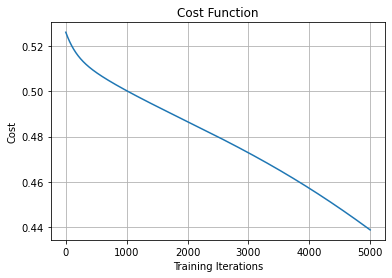

In [38]:
plt.grid()
plt.plot(range(num_iterations), cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')